<a href="https://colab.research.google.com/github/Arshiya109/python1/blob/main/MODULE_4_LAB_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4
## Lab 4: Support Vector Machines

## Things to try out:

1.  Try to run the same experiment after filtering different features, 2 at a time.
2.  Using different kinds of kernels for the SVM among: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

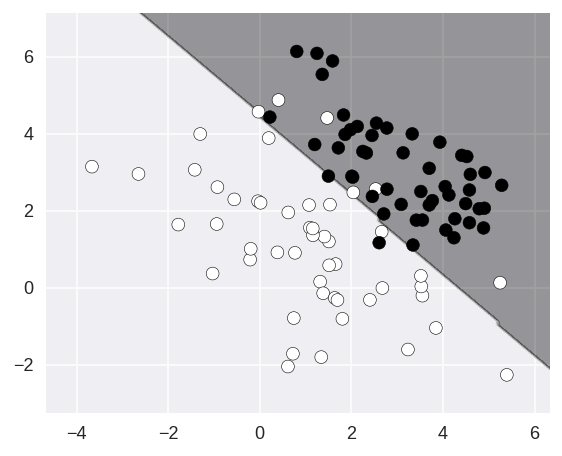

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Accuracy of the decision tree on the test set: 0.921
The confusion matrix is : 


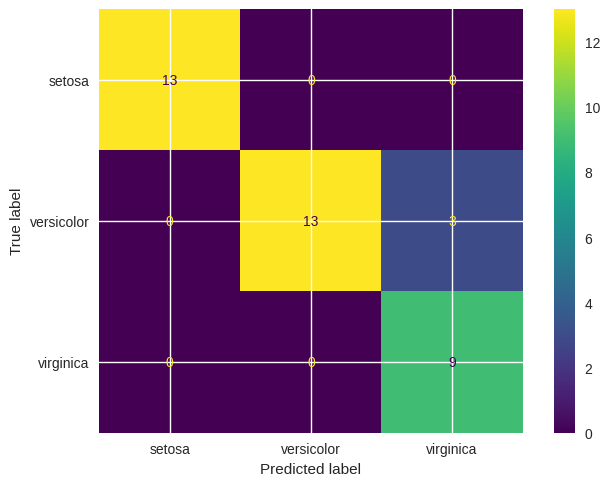

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



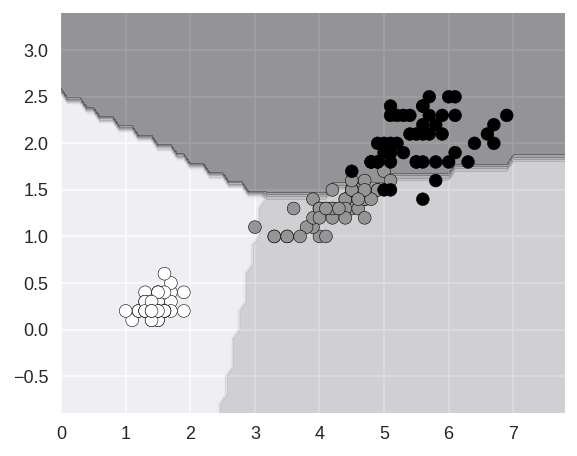

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



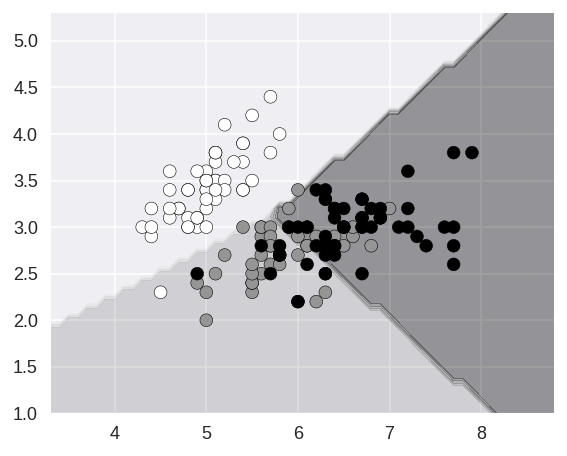

<ipython-input-6-1c442c8b4054>:98: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



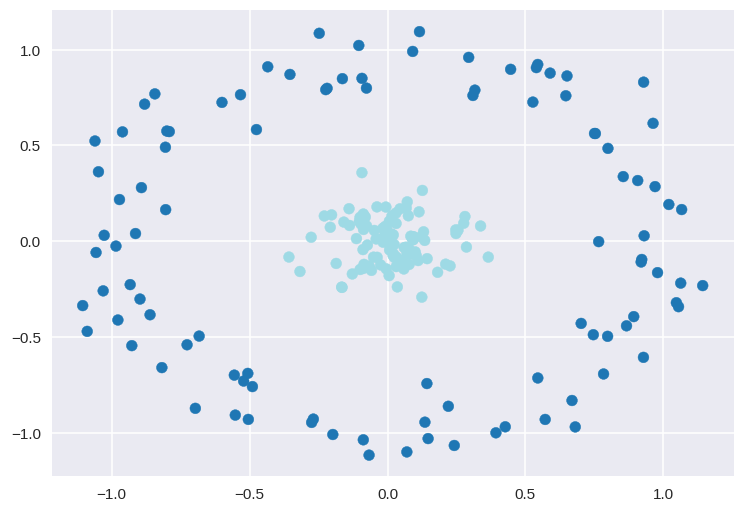

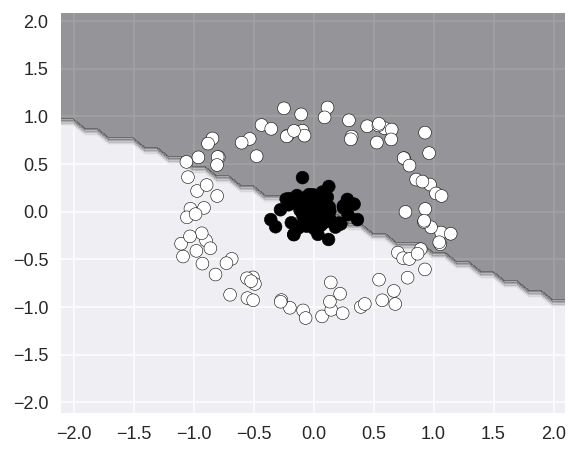

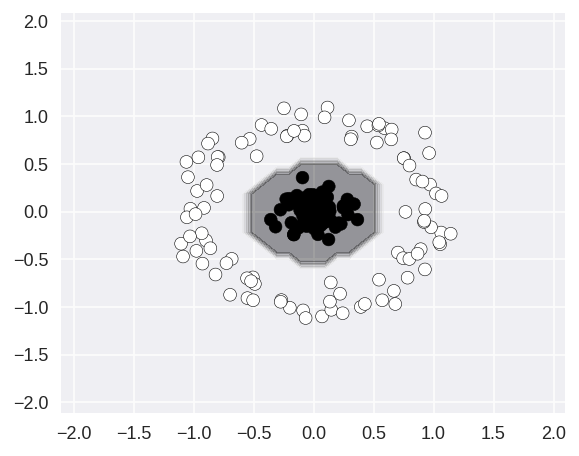

In [6]:
# Importing the necessary packages
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import svm
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import plotly.graph_objects as go

np.random.seed(0)

# Create synthetic dataset
ar = np.vstack([
    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size=50),
    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size=50)
])

testAr = np.vstack([
    np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size=500),
    np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size=500)
])
testy = np.array([0] * int((testAr.shape[0] / 2)) + [1] * int((testAr.shape[0] / 2)))

X = ar
y = np.array([0] * int((ar.shape[0] / 2)) + [1] * int((ar.shape[0] / 2)))


def plot_decision_boundary(X, y, pair, clf):
    x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
    y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    y_pred = y_pred.reshape(xx.shape)
    plt.figure(figsize=(5, 4))
    plt.contourf(xx, yy, y_pred, alpha=0.4)
    plt.scatter(X[:, pair[0]], X[:, pair[1]], c=y, s=50, edgecolor='k')
    plt.gcf().set_dpi(130)
    plt.show()


def boundary_exp():
    clf = svm.LinearSVC()
    pair = [0, 1]
    clf.fit(X[:, pair], y)
    plot_decision_boundary(X, y, pair, clf)


boundary_exp()

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create DataFrame for Iris dataset
iris_data = pd.DataFrame(data=np.hstack((X, y.reshape(y.shape[0], 1),
                                         [[iris["target_names"][int(class_idx)]] for class_idx in y])),
                         columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "Class", "ClassName"])

iris_data.sample(n=10, random_state=1)

# Train LinearSVC on Iris dataset
clf = svm.LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Display accuracy and confusion matrix
print(f"Accuracy of the decision tree on the test set: {accuracy_score(y_pred, y_test):.3f}")
class_names = iris["target_names"]
print("The confusion matrix is : ")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', values_format='.0f')
plt.show()

# Plot decision boundary for LinearSVC on Iris dataset
pair = [2, 3]
clf = svm.LinearSVC()
clf.fit(X[:, pair], y)
plot_decision_boundary(X, y, pair, clf)

pair = [0, 1]
clf = svm.LinearSVC()
clf.fit(X[:, pair], y)
plot_decision_boundary(X, y, pair, clf)

# Create synthetic circular dataset
X, y = make_circles(200, factor=.1, noise=.1)

# Train LinearSVC on circular dataset and plot decision boundary
clf = svm.SVC(kernel='linear').fit(X, y)
plt.style.use("seaborn")
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20')
plt.gcf().set_dpi(110)
plt.show()

# Train LinearSVC on circular dataset and plot decision boundary
clf = svm.LinearSVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plot_decision_boundary(X, y, pair, clf)

# Add additional feature to make 3D dataset
Z = np.array([[i[0] ** 2 + i[1] ** 2] for i in X])
X_new = np.hstack((X, Z))

# Plot 3D scatter plot for 3D dataset
fig = go.Figure(data=[go.Scatter3d(
    x=X_new[:, 0],
    y=X_new[:, 1],
    z=X_new[:, 2],
    mode="markers",
    marker={
        "color": y,
        "line": {"width": 4, "color": 'DarkSlateGrey'},
        "colorscale": "viridis"},
)])

fig.show()

# Train SVC on 3D dataset and plot decision boundary
clf = svm.SVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plot_decision_boundary(X, y, pair,clf)
